# 4.3 - Dask

![dask](images/dask.png)


$$$$

[Dask](https://dask.org/) es un proyecto de código abierto que permite a los desarrolladores crear su software en coordinación con scikit-learn , pandas y NumPy. Es una herramienta muy versátil que funciona con una amplia gama de cargas de trabajo.

Esta herramienta incluye dos partes importantes; programación dinámica de tareas y recopilación de big data. La parte anterior es muy similar a Luigi , Celery y Airflow , con la excepción de que está optimizada específicamente para cargas de trabajo computacionales interactivas.

La última parte incluye marcos de datos, matrices paralelas y listas extendidas a interfaces populares como pandas y NumPy. De hecho, el Sr. Matthew Rocklin, creador de Dask, confirma que Dask se creó originalmente para paralelizar pandas y NumPy, aunque ahora ofrece muchos más beneficios que un sistema paralelo genérico. Los marcos de datos de Dask son ideales para escalar los flujos de trabajo de pandas y habilitar aplicaciones para series de tiempo. Además, la matriz Dask ofrece análisis de datos multidimensionales para aplicaciones biomédicas, así como algoritmos de aprendizaje automático.

La característica mágica es que esta herramienta requiere cambios mínimos de código y además se ejecuta en clústeres de forma resistente. Además, puede ejecutar este código en paralelo mientras procesa datos, lo que simplemente se traduce en menos tiempo de ejecución, menos tiempo de espera.

El dataframe de Dask comprende marcos de datos de pandas más pequeños, por lo que permite subconjuntos de sintaxis de consulta de pandas. Además es totalmente capaz de programar, construir e incluso optimizar cálculos computacionales complejos en gráficos. Esta es la razón por la que las empresas que operan en cientos de terabytes pueden optar por esta herramienta como opción de acceso.

Dask también le permite crear canalizaciones para matrices de datos, que luego se pueden transferir a los recursos informáticos relevantes. Con todo, esta herramienta es mucho más que una versión paralela de pandas.

$$$$

![dask_process](images/dask_process.png)

$$$$

In [ ]:
%pip install "dask[complete]"
%pip install dask_ml

**Cargando varios archivos**

In [1]:
import dask
import dask.dataframe as dd

In [2]:
df = dd.read_csv('../data/accounts.*.csv')

df.head()

,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [3]:
df.tail()

,id,names,amount
999995,324,Ray,2152
999996,314,Jerry,1116
999997,459,Dan,1647
999998,29,Edith,21
999999,395,Jerry,454


In [4]:
df.shape

(Delayed('int-8b4908c7-4a91-4444-8920-e1aefbdcf70a'), 3)

In [5]:
len(df)

3000000

### Ejemplo aeropuertos

In [6]:
df = dd.read_csv('../data/nycflights/*.csv')

df.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
0,1990,1,1,1,1621.0,1540,1747.0,1701,US,33,...,NaN,46.0,41.0,EWR,PIT,319.0,NaN,NaN,0,0
1,1990,1,2,2,1547.0,1540,1700.0,1701,US,33,...,NaN,-1.0,7.0,EWR,PIT,319.0,NaN,NaN,0,0
2,1990,1,3,3,1546.0,1540,1710.0,1701,US,33,...,NaN,9.0,6.0,EWR,PIT,319.0,NaN,NaN,0,0
3,1990,1,4,4,1542.0,1540,1710.0,1701,US,33,...,NaN,9.0,2.0,EWR,PIT,319.0,NaN,NaN,0,0
4,1990,1,5,5,1549.0,1540,1706.0,1701,US,33,...,NaN,5.0,9.0,EWR,PIT,319.0,NaN,NaN,0,0


In [7]:
df.tail()

ValueError: Mismatched dtypes found in `pd.read_csv`/`pd.read_table`.

+----------------+---------+----------+
| Column         | Found   | Expected |
+----------------+---------+----------+
| CRSElapsedTime | float64 | int64    |
| TailNum        | object  | float64  |
+----------------+---------+----------+

The following columns also raised exceptions on conversion:

- TailNum
  ValueError("could not convert string to float: 'N54711'")

Usually this is due to dask's dtype inference failing, and
*may* be fixed by specifying dtypes manually by adding:

dtype={'CRSElapsedTime': 'float64',
       'TailNum': 'object'}

to the call to `read_csv`/`read_table`.

In [8]:
df = dd.read_csv('../data/nycflights/*.csv',
                
                dtype={'TailNum': str,
                       'CRSElapsedTime': float,
                       'Cancelled': bool})



df.tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,Diverted
269176,1999,12,27,1,1645.0,1645,1830.0,1901,UA,1753,...,205.0,-31.0,0.0,LGA,DEN,1619.0,7.0,13.0,False,0
269177,1999,12,28,2,1726.0,1645,1928.0,1901,UA,1753,...,214.0,27.0,41.0,LGA,DEN,1619.0,5.0,23.0,False,0
269178,1999,12,29,3,1646.0,1645,1846.0,1901,UA,1753,...,220.0,-15.0,1.0,LGA,DEN,1619.0,5.0,15.0,False,0
269179,1999,12,30,4,1651.0,1645,1908.0,1901,UA,1753,...,233.0,7.0,6.0,LGA,DEN,1619.0,5.0,19.0,False,0
269180,1999,12,31,5,1642.0,1645,1851.0,1901,UA,1753,...,232.0,-10.0,-3.0,LGA,DEN,1619.0,6.0,11.0,False,0


In [10]:
df.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 23 entries, Year to Diverted
dtypes: object(4), bool(1), float64(10), int64(8)
memory usage: 440.9 MB


In [11]:
%%time

df.shape

CPU times: user 663 µs, sys: 25 µs, total: 688 µs
Wall time: 675 µs


(Delayed('int-3c62914d-4af0-4e4c-aa98-39cadfd550d7'), 23)

In [12]:
%%time

len(df)

CPU times: user 3.59 s, sys: 749 ms, total: 4.34 s
Wall time: 1.6 s


2611892

In [17]:
df.DepDelay.max().compute()

1435.0

In [ ]:
%pip install graphviz
%pip install python-graphviz
#conda install python-graphviz

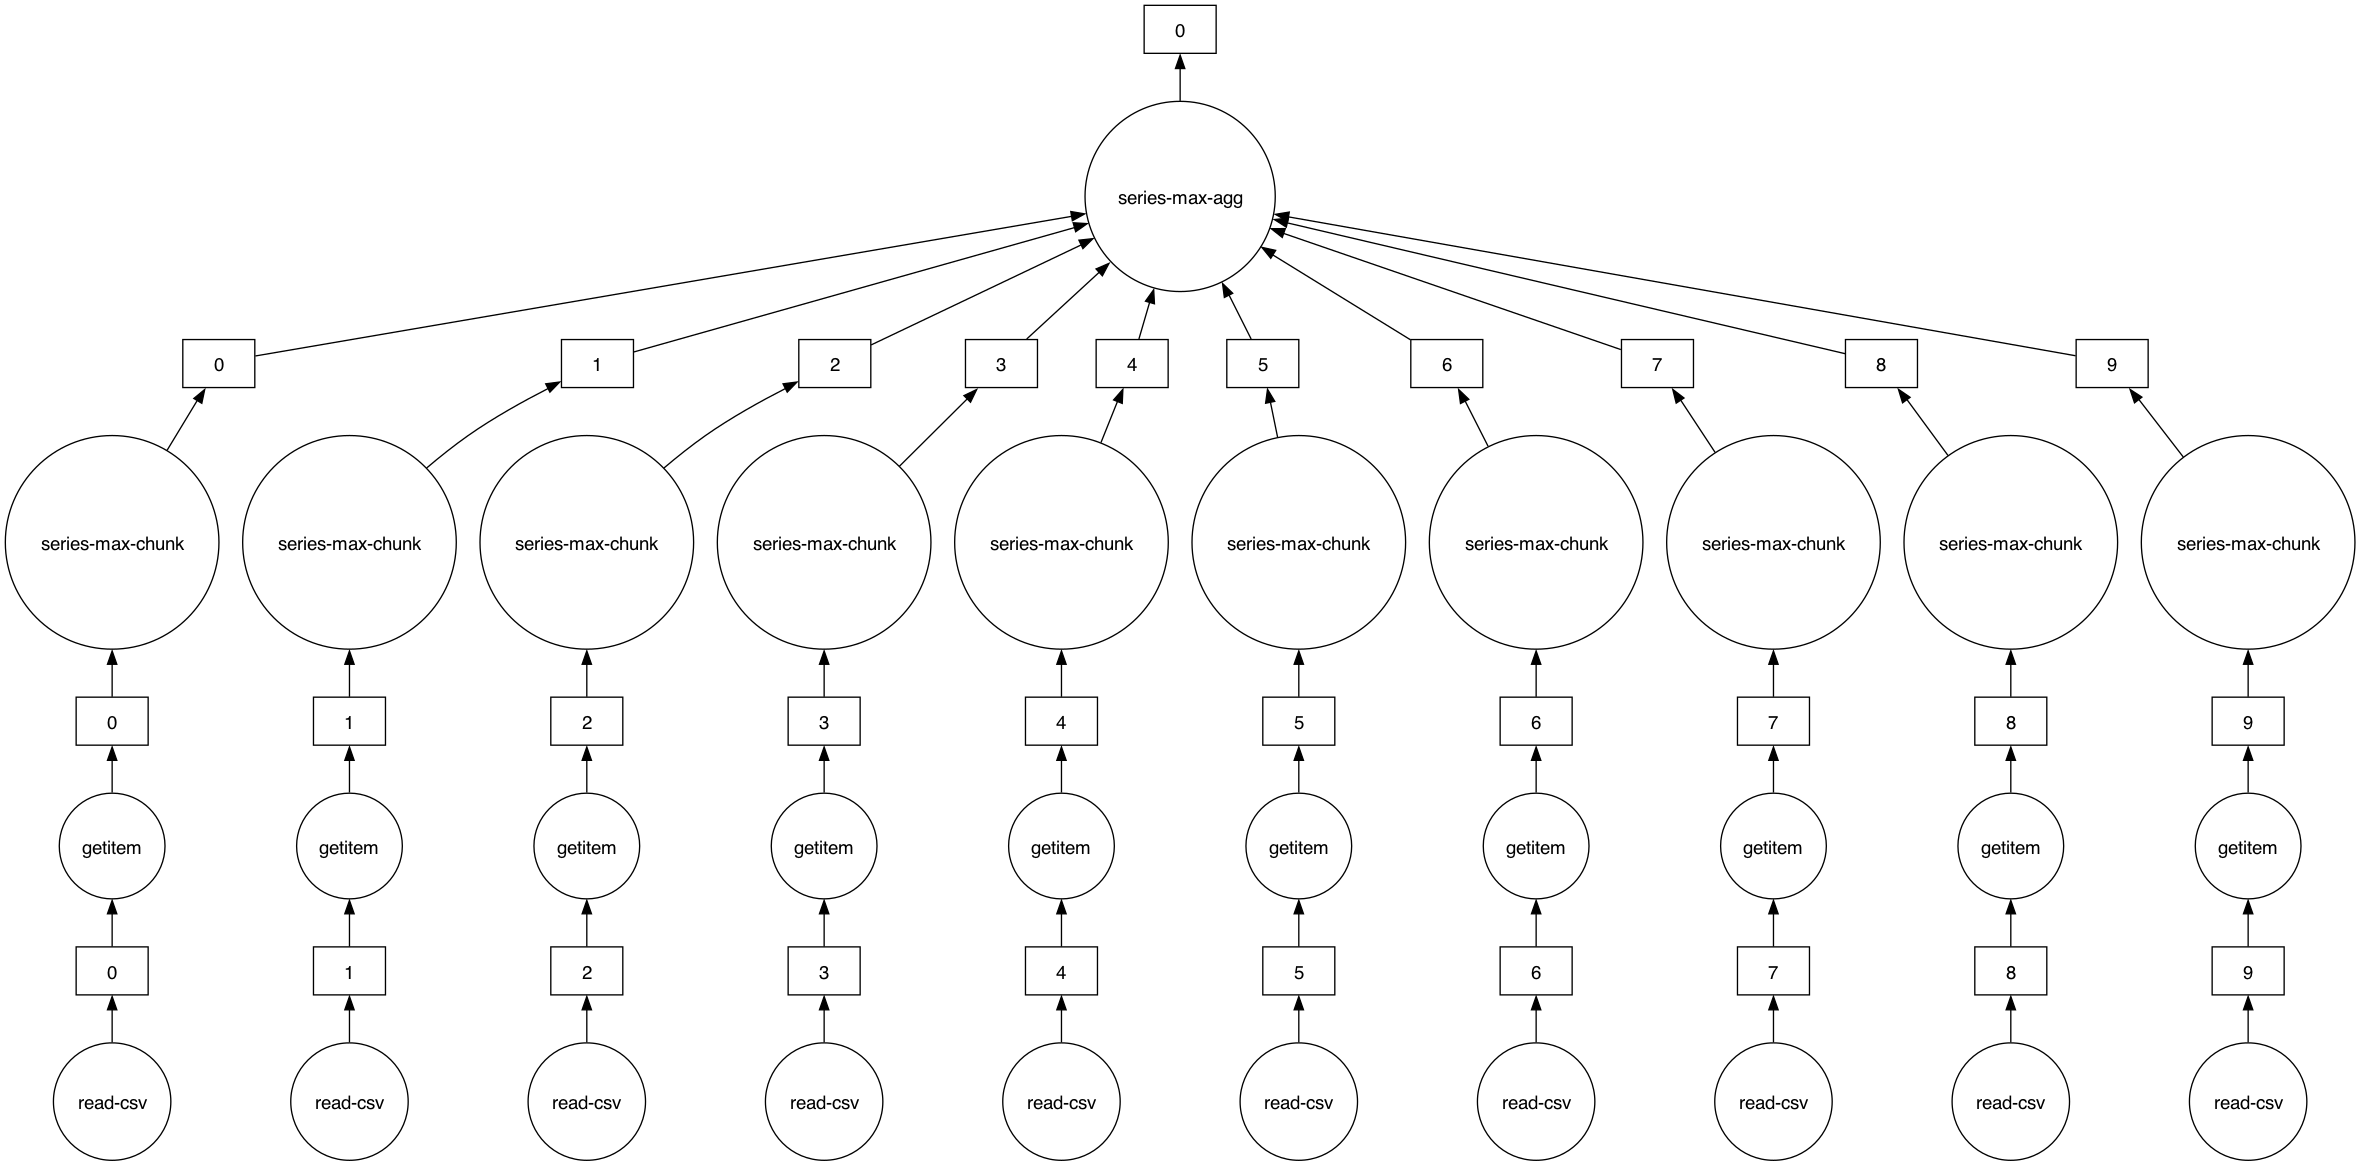

In [18]:
df.DepDelay.max().visualize(filename='images/max_dask.png')

In [20]:
df.groupby('Origin').DepDelay.mean().compute()

Origin
EWR    10.295469
JFK    10.351299
LGA     7.431142
Name: DepDelay, dtype: float64

In [21]:
%%time

len(df[~df.Cancelled])    # nº de vuelos NO cancelados

CPU times: user 3.58 s, sys: 713 ms, total: 4.3 s
Wall time: 1.55 s


2540961

In [22]:
no_cancelado = df[~df.Cancelled]

media_delay = no_cancelado.DepDelay.mean()

std_delay = no_cancelado.DepDelay.std()

In [23]:
media_delay

dd.Scalar<series-..., dtype=float64>

In [24]:
std_delay

dd.Scalar<series-..., dtype=float64>

In [25]:
%%time

media_delay.compute()

CPU times: user 3.72 s, sys: 766 ms, total: 4.48 s
Wall time: 1.65 s


9.206602541321965

In [26]:
%%time

std_delay.compute()

CPU times: user 3.65 s, sys: 761 ms, total: 4.41 s
Wall time: 1.62 s


28.974539774551456

In [27]:
%%time

media_delay_res, std_delay_res = dask.compute(media_delay, std_delay)  # paralelizar el calculo de dos variables

CPU times: user 3.64 s, sys: 697 ms, total: 4.34 s
Wall time: 1.54 s


In [28]:
media_delay_res, std_delay_res

(9.206602541321965, 28.974539774551456)

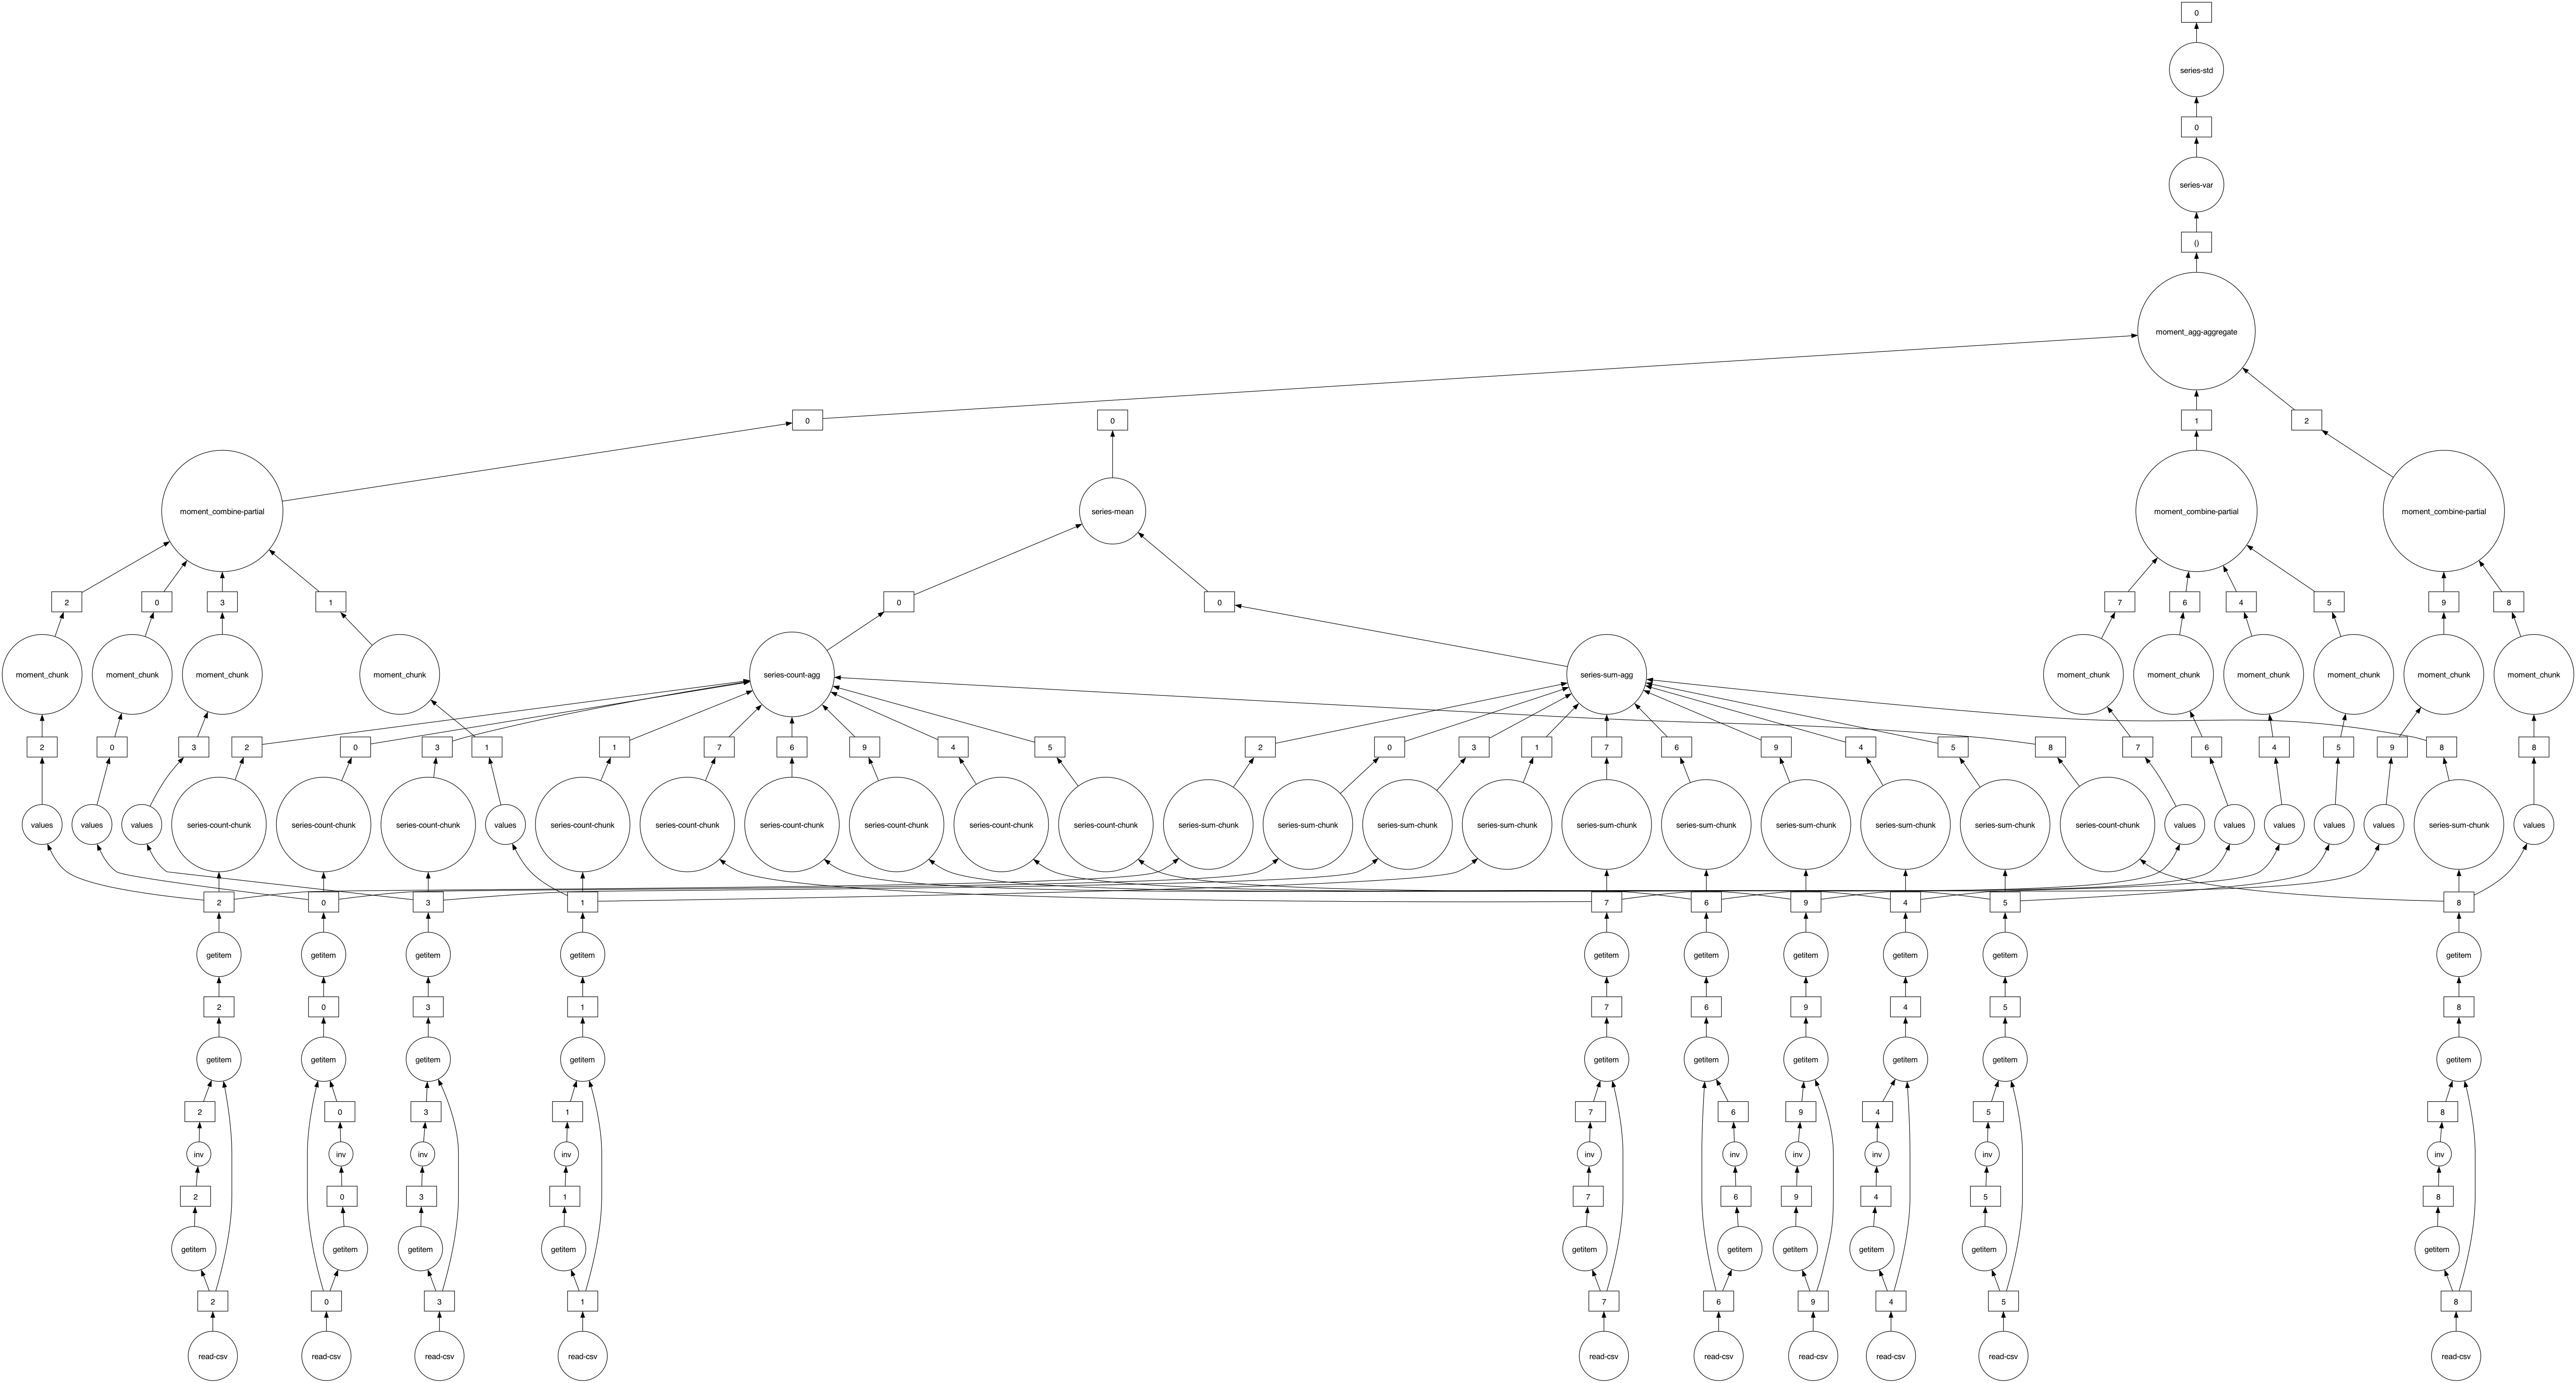

In [29]:
dask.visualize(media_delay, std_delay, filename='images/max_dask.png')

In [34]:
a,b,c = [i for i in range(3)]

In [35]:
a

0

In [36]:
b

1

In [37]:
c

2

In [38]:
a,b,c

(0, 1, 2)

### Tip

El tipo de archivo cambia la forma de procesar y su velocidad. Usaremos archivos `.csv`, `.parquet` y `h5` o `hdfs`

In [39]:
import os

In [40]:
archivos = os.path.join('../data', 'accounts.*.csv')

archivos

'../data/accounts.*.csv'

In [41]:
%time df_csv = dd.read_csv(archivos)

df_csv.head()

CPU times: user 5.11 ms, sys: 7.18 ms, total: 12.3 ms
Wall time: 11 ms


,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [42]:
target=os.path.join('../data', 'accounts.h5')

target

'../data/accounts.h5'

In [43]:
%time df_csv.to_hdf(target, key='../data')

/opt/homebrew/Caskroom/miniconda/base/envs/clase/lib/python3.9/site-packages/tables/path.py:137: NaturalNameWarning: object name is not a valid Python identifier: '..'; it does not match the pattern ``^[a-zA-Z_][a-zA-Z0-9_]*$``; you will not be able to use natural naming to access this object; using ``getattr()`` will still work, though
  check_attribute_name(name)


CPU times: user 1.73 s, sys: 439 ms, total: 2.17 s
Wall time: 2.59 s


['../data/accounts.h5', '../data/accounts.h5', '../data/accounts.h5']

In [44]:
%time df_hdf = dd.read_hdf(target, key='../data')

df_hdf.head()

CPU times: user 11.8 ms, sys: 2.9 ms, total: 14.7 ms
Wall time: 14.2 ms


,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [45]:
df_csv.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: object(1), int64(2)
memory usage: 68.7 MB


In [46]:
df_hdf.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: object(1), int64(2)
memory usage: 91.6 MB


In [47]:
%time df_csv.amount.sum().compute()

CPU times: user 236 ms, sys: 76.5 ms, total: 312 ms
Wall time: 131 ms


3101435607

In [48]:
%time df_hdf.amount.sum().compute()

CPU times: user 798 ms, sys: 106 ms, total: 904 ms
Wall time: 908 ms


3101435607

In [ ]:
# parquet
%pip install fastparquet

In [ ]:
%pip install pyarrow

In [49]:
target=os.path.join('../data', 'accounts.parquet')

df_csv.categorize(columns=['names']).to_parquet(target,
                                                storage_options={'has_nulls':True},
                                                engine='fastparquet')

In [50]:
%%time 

df_par=dd.read_parquet('../data/accounts.parquet', engine='pyarrow')

df_par.head()

CPU times: user 102 ms, sys: 35.8 ms, total: 138 ms
Wall time: 553 ms


,id,names,amount
0,23,Ursula,1380
1,92,Tim,-178
2,239,Alice,-784
3,260,Michael,-249
4,314,Jerry,1299


In [51]:
df_par.info(memory_usage='deep')

<class 'dask.dataframe.core.DataFrame'>
Columns: 3 entries, id to amount
dtypes: category(1), int64(2)
memory usage: 71.5 MB


In [52]:
%time df_hdf.amount.sum().compute()

CPU times: user 777 ms, sys: 109 ms, total: 886 ms
Wall time: 914 ms


3101435607

In [53]:
%time df_csv.amount.sum().compute()

CPU times: user 235 ms, sys: 77.7 ms, total: 313 ms
Wall time: 132 ms


3101435607

In [54]:
%time df_par.amount.sum().compute()

CPU times: user 67.1 ms, sys: 29.9 ms, total: 97 ms
Wall time: 52.7 ms


3101435607